In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
import yfinance as yf

# import data 
def get_data(stocks, start, end):
    stockData = yf.download(stocks, start, end)
    stockData = stockData['Close']
    returns = stockData.pct_change()
    meanReturns = returns.mean()
    covMatrix = returns.cov()
    return meanReturns, covMatrix

stockList = ['AAPL', 'AMZN', 'TSLA', 'MSFT', 'KO', 'GS']
endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days = 300) 

meanReturns, covMatrix = get_data(stockList, startDate, endDate)

weights = np.random.random(len(meanReturns))
weights /= np.sum(weights)

print(meanReturns)
print(covMatrix)
print(weights)


[*********************100%%**********************]  6 of 6 completed

Ticker
AAPL    0.000003
AMZN    0.001894
GS      0.001462
KO      0.000091
MSFT    0.001041
TSLA   -0.001483
dtype: float64
Ticker      AAPL      AMZN        GS        KO      MSFT      TSLA
Ticker                                                            
AAPL    0.000179  0.000073  0.000023  0.000016  0.000078  0.000151
AMZN    0.000073  0.000326  0.000059  0.000008  0.000137  0.000123
GS      0.000023  0.000059  0.000180  0.000021  0.000035  0.000084
KO      0.000016  0.000008  0.000021  0.000068  0.000014  0.000030
MSFT    0.000078  0.000137  0.000035  0.000014  0.000163  0.000092
TSLA    0.000151  0.000123  0.000084  0.000030  0.000092  0.001036
[0.01652872 0.17230463 0.42684138 0.19277346 0.11417905 0.07737277]


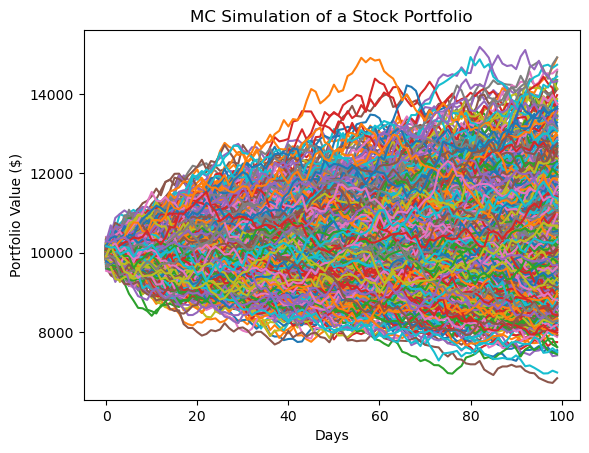

In [3]:
# Monte Carlo Method
# number of simulations
mc_sims = 1000
T = 100 # timeframe in days

meanMatrix = np.full(shape=(T, len(weights)), fill_value = meanReturns)
meanMatrix = meanMatrix.T

portfolio_sims = np.full(shape=(T, mc_sims), fill_value = 0.0)

initialPortfolio = 10000

for m in range(0, mc_sims):
    # MC loops
    Z = np.random.normal(size = (T, len(weights)))
    L = np.linalg.cholesky(covMatrix)
    dailyReturns = meanMatrix + np.inner(L, Z)
    portfolio_sims[:, m] = np.cumprod(np.inner(weights, dailyReturns.T)+1)*initialPortfolio
                                      
plt.plot(portfolio_sims)
plt.ylabel('Portfolio Value ($)')
plt.xlabel('Days')
plt.title('MC Simulation of a Stock Portfolio')
plt.show()                                      
                                      
                                      
                                      
                                      
                                      
                                      